https://scikit-learn.org/stable/datasets.html

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=32245b73007528924a817044b59c97f3cdfcc1d9ec62089c2f1250d81fed3a97
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

# KMO Test
'''
Mide la proporción de varianza entre las variables que podría ser común
(compartida) y, por tanto, que puede explicarse mediante factores latentes.
 En otras palabras, evalúa si los datos son adecuados para realizar un análisis factorial.

Valor KMO	    Interpretación
0.90 a 1.00	  Excelente
0.80 a 0.89	  Muy bueno
0.70 a 0.79	  Bueno
0.60 a 0.69	  Aceptable
0.50 a 0.59	  Deficiente
Menor a 0.50	Inaceptable: no hacer análisis factorial
'''
kmo_all, kmo_model = calculate_kmo(df_scaled)
print(f"KMO Score: {kmo_model}")

# Bartlett's Test
'''
El test de esfericidad de Bartlett se utiliza en análisis factorial para evaluar
si la matriz de correlaciones entre las variables es significativamente diferente de una matriz identidad

H₀ (hipótesis nula): La matriz de correlaciones es una matriz identidad (no hay correlación entre variables).
'''
chi_square_value, p_value = calculate_bartlett_sphericity(df_scaled)
print(f"Chi-Square: {chi_square_value}, P-value: {p_value}")

KMO Score: 0.540076675009722
Chi-Square: 706.9592430234726, P-value: 1.9226796044171964e-149


In [ ]:
fa = FactorAnalyzer(n_factors=3)
fa.fit(df_scaled)

'''
Un loading indica cuánto contribuye un factor a explicar la variabilidad de una variable.
'''
factor_loadings = pd.DataFrame(fa.loadings_, index=df.columns)
print(factor_loadings)

                          0         1         2
sepal length (cm)  1.069077  0.071041 -0.087023
sepal width (cm)   0.011409  0.796224  0.038874
petal length (cm)  0.670067 -0.199590  0.292164
petal width (cm)   0.432933  0.069784  0.689062


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
varianza_explicada, pct_de_varianza, pct_de_varianza_acumulada = fa.get_factor_variance()
pct_de_varianza_acumulada

array([0.44486934, 0.61580069, 0.7581134 ])

In [ ]:
eigenvalues = fa.get_eigenvalues()
eigenvalues

(array([2.91849782, 0.91403047, 0.14675688, 0.02071484]),
 array([ 2.708733  ,  0.65084642,  0.02972431, -0.35685014]))

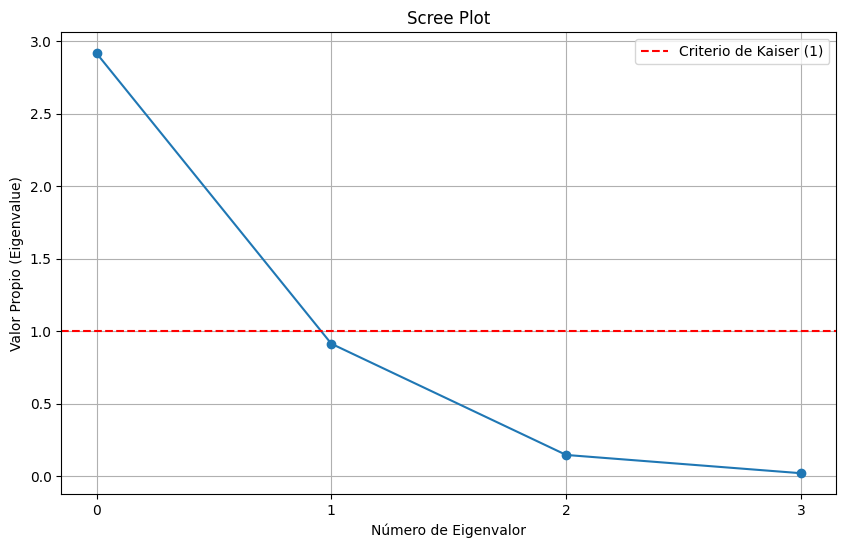

In [ ]:
'''
El criterio de Kaiser (también conocido como regla del valor propio mayor que 1)
es una regla práctica utilizada en análisis factorial y análisis de componentes
principales (PCA) para decidir cuántos factores (o componentes) retener.


Se deben retener solo los factores cuyo eigenvalor (valor propio) sea mayor que 1.
'''
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues[0], marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de Eigenvalor')
plt.ylabel('Valor Propio (Eigenvalue)')
plt.xticks(range(0, len(eigenvalues[0])))  # Ejes X para cada factor
plt.axhline(1, linestyle='--', color='red', label='Criterio de Kaiser (1)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# reducción de dimensiones
df_reduced = fa.transform(df_scaled)
df_reduced = pd.DataFrame(df_reduced, columns=[f'Factor_{i+1}' for i in range(df_reduced.shape[1])])
df_reduced.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor_1,Factor_2,Factor_3
0,-1.037552,1.187804,-1.370619
1,-1.225959,0.681808,-1.230350
2,-1.421427,0.600638,-1.085222
3,-1.482080,0.111794,-0.954284
4,-1.127368,1.073407,-1.284561


Otro ejemplo

In [ ]:
# https://osf.io/s87kd
# Dataset BFI (dataset based on personality assessment project)
# 1 Very Inaccurate, 2 Moderately Inaccurate, 3 Slightly Inaccurate 4 Slightly Accurate, 5 Moderately Accurate, 6 Very Accurate
bfi = pd.read_csv("bfi.csv")
bfi.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [ ]:
bfi.shape

(2800, 28)

In [ ]:
bfi.drop(['gender', 'education', 'age'],axis=1,inplace=True)
bfi.dropna(inplace=True)

In [ ]:
kmo_all, kmo_model = calculate_kmo(bfi)
print(f"KMO Score: {kmo_model}")

chi_square_value, p_value = calculate_bartlett_sphericity(bfi)
print(f"Chi-Square: {chi_square_value}, P-value: {p_value}")

KMO Score: 0.8486452309468383
Chi-Square: 18146.065577235386, P-value: 0.0


In [ ]:
fa = FactorAnalyzer(n_factors=10)
fa.fit(bfi)

factor_loadings = pd.DataFrame(fa.loadings_, index=bfi.columns)
print(factor_loadings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


           0         1         2         3         4         5         6  \
A1 -0.130132  0.085809  0.053554  0.067803  0.087682  0.501109  0.087800   
A2  0.205351 -0.014518  0.048674 -0.081953  0.113198 -0.621038  0.316804   
A3  0.825891  0.136100 -0.060913  0.115831 -0.006391 -0.202909 -0.019629   
A4  0.493880  0.012496  0.094270  0.066736  0.065748 -0.107717 -0.054548   
A5  0.712522 -0.057160 -0.016441 -0.039350  0.001386 -0.052237 -0.077418   
C1  0.028475 -0.017527  0.680428 -0.055207 -0.008290  0.104748 -0.017289   
C2  0.051421  0.008356  0.662376  0.073179 -0.012778  0.096975  0.057343   
C3 -0.078600 -0.050645  0.531162  0.051908  0.106239 -0.063859  0.173926   
C4  0.032573 -0.061817 -0.592569  0.082245  0.163002  0.109092  0.110904   
C5 -0.101451  0.026996 -0.380147 -0.056211  0.101593 -0.066893 -0.019728   
E1  0.109950 -0.042441  0.080751  0.731996  0.084459  0.144717 -0.071205   
E2 -0.082798  0.044715  0.001047  0.610042 -0.012358  0.026987 -0.164059   
E3  0.378355

In [ ]:
varianza_explicada, pct_de_varianza, pct_de_varianza_acumulada = fa.get_factor_variance()
pct_de_varianza_acumulada

array([0.07964211, 0.15463017, 0.22556589, 0.27695113, 0.3280409 ,
       0.36226513, 0.39498555, 0.42093532, 0.44502968, 0.46365221])

In [ ]:
eigenvalues = fa.get_eigenvalues()
eigenvalues

(array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
        1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
        0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
        0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
        0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902]),
 array([ 4.62898577e+00,  2.31254015e+00,  1.61142915e+00,  1.23860611e+00,
         1.02939462e+00,  5.24907659e-01,  3.78729888e-01,  2.52062341e-01,
         2.03168411e-01,  1.15836070e-01,  9.90664899e-02,  7.66128573e-02,
         3.96248402e-02,  1.98159626e-02,  1.35117827e-02,  2.38558819e-03,
        -2.23622213e-03, -3.06581013e-02, -8.25384493e-02, -9.31122569e-02,
        -1.00310645e-01, -1.41390475e-01, -1.44578582e-01, -1.75116371e-01,
        -1.85431327e-01]))

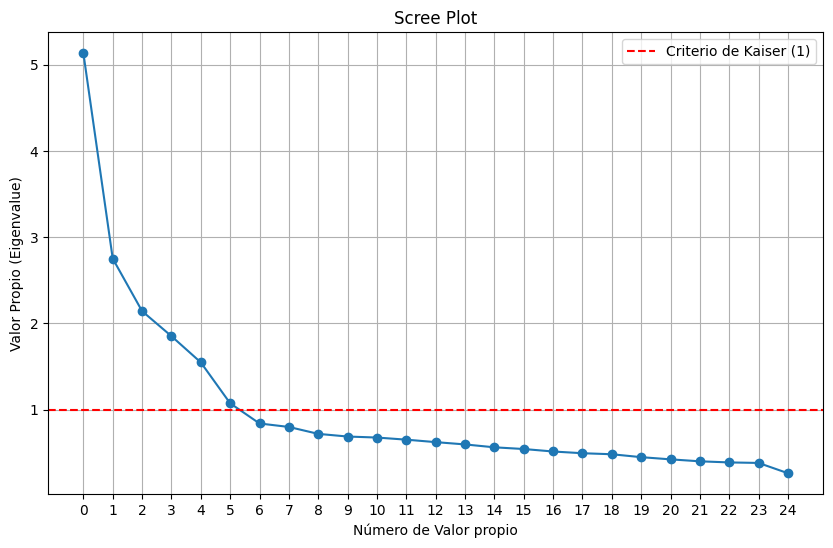

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues[0], marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de Valor propio')
plt.ylabel('Valor Propio (Eigenvalue)')
plt.xticks(range(0, len(eigenvalues[0])))  # Ejes X para cada factor
plt.axhline(1, linestyle='--', color='red', label='Criterio de Kaiser (1)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(bfi)

factor_loadings = pd.DataFrame(fa.loadings_, index=bfi.columns)
print(factor_loadings)

           0         1         2         3         4
A1  0.111126  0.040465  0.022798 -0.428166 -0.077931
A2  0.029588  0.213716  0.139037  0.626946  0.062139
A3  0.009357  0.317848  0.109331  0.650743  0.056196
A4 -0.066476  0.204566  0.230584  0.435624 -0.112700
A5 -0.122113  0.393034  0.087869  0.537087  0.066708
C1  0.010416  0.070184  0.545824  0.038878  0.209584
C2  0.089574  0.033270  0.648731  0.102782  0.115434
C3 -0.030855  0.023907  0.557036  0.111578 -0.005183
C4  0.240410 -0.064984 -0.633806 -0.037498 -0.107535
C5  0.290318 -0.176395 -0.562467 -0.047525  0.036822
E1  0.042819 -0.574835  0.033144 -0.104813 -0.058795
E2  0.244743 -0.678731 -0.102483 -0.112517 -0.042010
E3  0.024180  0.536816  0.083010  0.257906  0.280877
E4 -0.115614  0.646833  0.102023  0.306101 -0.073422
E5  0.036145  0.504069  0.312899  0.090354  0.213739
N1  0.786807  0.078923 -0.045997 -0.216363 -0.084704
N2  0.754109  0.027301 -0.030568 -0.193744 -0.010304
N3  0.731721 -0.061430 -0.067084 -0.027712 -0.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cada factor está asociado a cada uno de los factores latentes está asociado a cada uno de los factores de la personalidad del big five. Mientras que el sexto factor no está asociado espacialmente a ninguno en especial, por lo cual escoger cinco factores sería correcto.

In [ ]:
varianza_explicada, pct_de_varianza, pct_de_varianza_acumulada = fa.get_factor_variance()
pct_de_varianza_acumulada

array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916])

In [ ]:
bfi_reduced = fa.transform(bfi)
bfi_reduced = pd.DataFrame(bfi_reduced, columns=[f'Factor_{i+1}' for i in range(bfi_reduced.shape[1])])
bfi_reduced.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384
2,0.520534,0.318235,0.025646,-0.751136,0.204503
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042
